In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import pandas_profiling 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

In [615]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [295]:
pd.options.display.float_format = '{:.2f}'.format

In [296]:
pd.options.display.max_rows = 10000
pd.set_option('display.max_columns', None)

In [297]:
credit_data= pd.read_csv('CC_GENERAL.csv')

In [298]:
credit_data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,nan,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [299]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [300]:
## function to remove column from categorical and numerical features
def remove_columns_from_list(col):
        if col in categorical:
            categorical.remove(col)
        elif col in numerical:
            numerical.remove(col)
        else:
            print("Variable not present in both the list")

In [301]:
def remove_columns_from_main_set(col):
    credit_data.drop(col,axis=1,inplace=True)
    

In [302]:
def missing_treatment(col):
    if col in categorical:
        credit_data[col].fillna(credit_data[col].mode()[0],inplace=True)
    elif col in numerical:
        credit_data[col].fillna(credit_data[col].median(),inplace=True)
    else:
        print("Variable not present in both the list")
        
    

In [303]:
def cont_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), round(x.sum(),2), round(x.mean(),2), round(x.median(),2),  round(x.std(),2), round(x.var(),2), round((x.std()/x.mean()),2), round(x.min(),2), round(x.dropna().quantile(0.01),2), round(x.dropna().quantile(0.05),2),round(x.dropna().quantile(0.10),2),round(x.dropna().quantile(0.25),2),round(x.dropna().quantile(0.50),2),round(x.dropna().quantile(0.75),2), round(x.dropna().quantile(0.90),2),round(x.dropna().quantile(0.95),2), round(x.dropna().quantile(0.99),2),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

def cat_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [304]:
dummy_var=[]
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname+"_", drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    for col1 in col_dummies:
         dummy_var.append(col1)
    return df


#for col in cat_var:
 #   card_final_data = create_dummies(card_final_data , col )

### Separating credit card columns into categorical and numerical

In [305]:
numerical=[key for key in dict(credit_data.dtypes) if dict(credit_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical=[key for key in dict(credit_data.dtypes) if dict(credit_data.dtypes)[key] in ['object']]
print(numerical)
print(categorical)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
['CUST_ID']


In [306]:
categorical

['CUST_ID']

In [307]:
numerical

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

#### As cust_id is unique to data,hence we will drop this variable

In [308]:
remove_columns_from_list('CUST_ID')
remove_columns_from_main_set('CUST_ID')

In [309]:
categorical

[]

In [310]:
credit_data.shape

(8950, 17)

In [311]:
print(f"Number of numerical variables = {len(numerical)}")
print(f"Number of categorical variables = {len(categorical)}")


Number of numerical variables = 17
Number of categorical variables = 0


In [312]:
credit_data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,nan,0.00,12
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


### Data Audit report

In [313]:
num_var_summary = credit_data[numerical].apply(cont_var_summary)
num_var_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
N,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
NMISS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,313.00,0.00,0.00
SUM,14002049.71,7851.57,8978683.26,5302314.47,3679055.42,8760896.46,4388.64,1812.00,3261.71,1209.54,29077.00,131653.00,40220828.13,15511637.48,7464151.91,1375.75,103080.00
MEAN,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
MEDIAN,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
STD,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
VAR,4332774.97,0.06,4565208.19,2755227.90,817827.43,4398096.33,0.16,0.09,0.16,0.04,46.58,617.90,13240979.88,8381394.16,5628502.90,0.09,1.79
CV,1.33,0.27,2.13,2.80,2.20,2.14,0.82,1.47,1.09,1.48,2.10,1.69,0.81,1.67,2.75,1.90,0.12
MIN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
P1,0.07,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,0.00,19.52,0.00,6.00


In [276]:
cat_var_summary = credit_data[categorical].apply(cat_var_summary).T
cat_var_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Missing treatment

In [314]:
credit_data.isnull().sum()[credit_data.isnull().sum() > 0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [315]:
missing_cols=['CREDIT_LIMIT','MINIMUM_PAYMENTS']
for mis in missing_cols:
    missing_treatment(mis)

In [316]:
credit_data.isnull().sum()[credit_data.isnull().sum() > 0]

Series([], dtype: int64)

In [317]:
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,312.34,0.00,12
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [318]:
credit_data.columns.shape

(17,)

### Creation of new KPIs

In [320]:
credit_data['MONTHLY_AVG_PURCHASE']=credit_data['PURCHASES']/credit_data['TENURE']

In [321]:
    credit_data['MONTHLY_CASH_ADVANCE']=credit_data['CASH_ADVANCE']/credit_data['TENURE']

In [322]:
credit_data['LIMIT_USAGE']=credit_data['BALANCE']/credit_data['CREDIT_LIMIT']

In [323]:
credit_data['PURCHASE_TYPE']=np.where((credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']==0),'None',
                                      np.where(
                                          (credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']==0),'One_Of',
                                           
                                           np.where((credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']>0),'Installment_Purchases',
                                                     np.where((credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']>0),'Both',np.nan
                                                     
                                                     
                                                     )
                                                     
                                           
                                           
                                           )
                                      
                                      
                                      )
                                      
                                      
                                      )

In [687]:
credit_data['PAYMENT_MINPAY']=credit_data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [343]:
categorical.append('PURCHASE_TYPE')

In [325]:
credit_data['LIMIT_USAGE'].head()

0   0.04
1   0.46
2   0.33
3   0.22
4   0.68
Name: LIMIT_USAGE, dtype: float64

### Outliers treatment

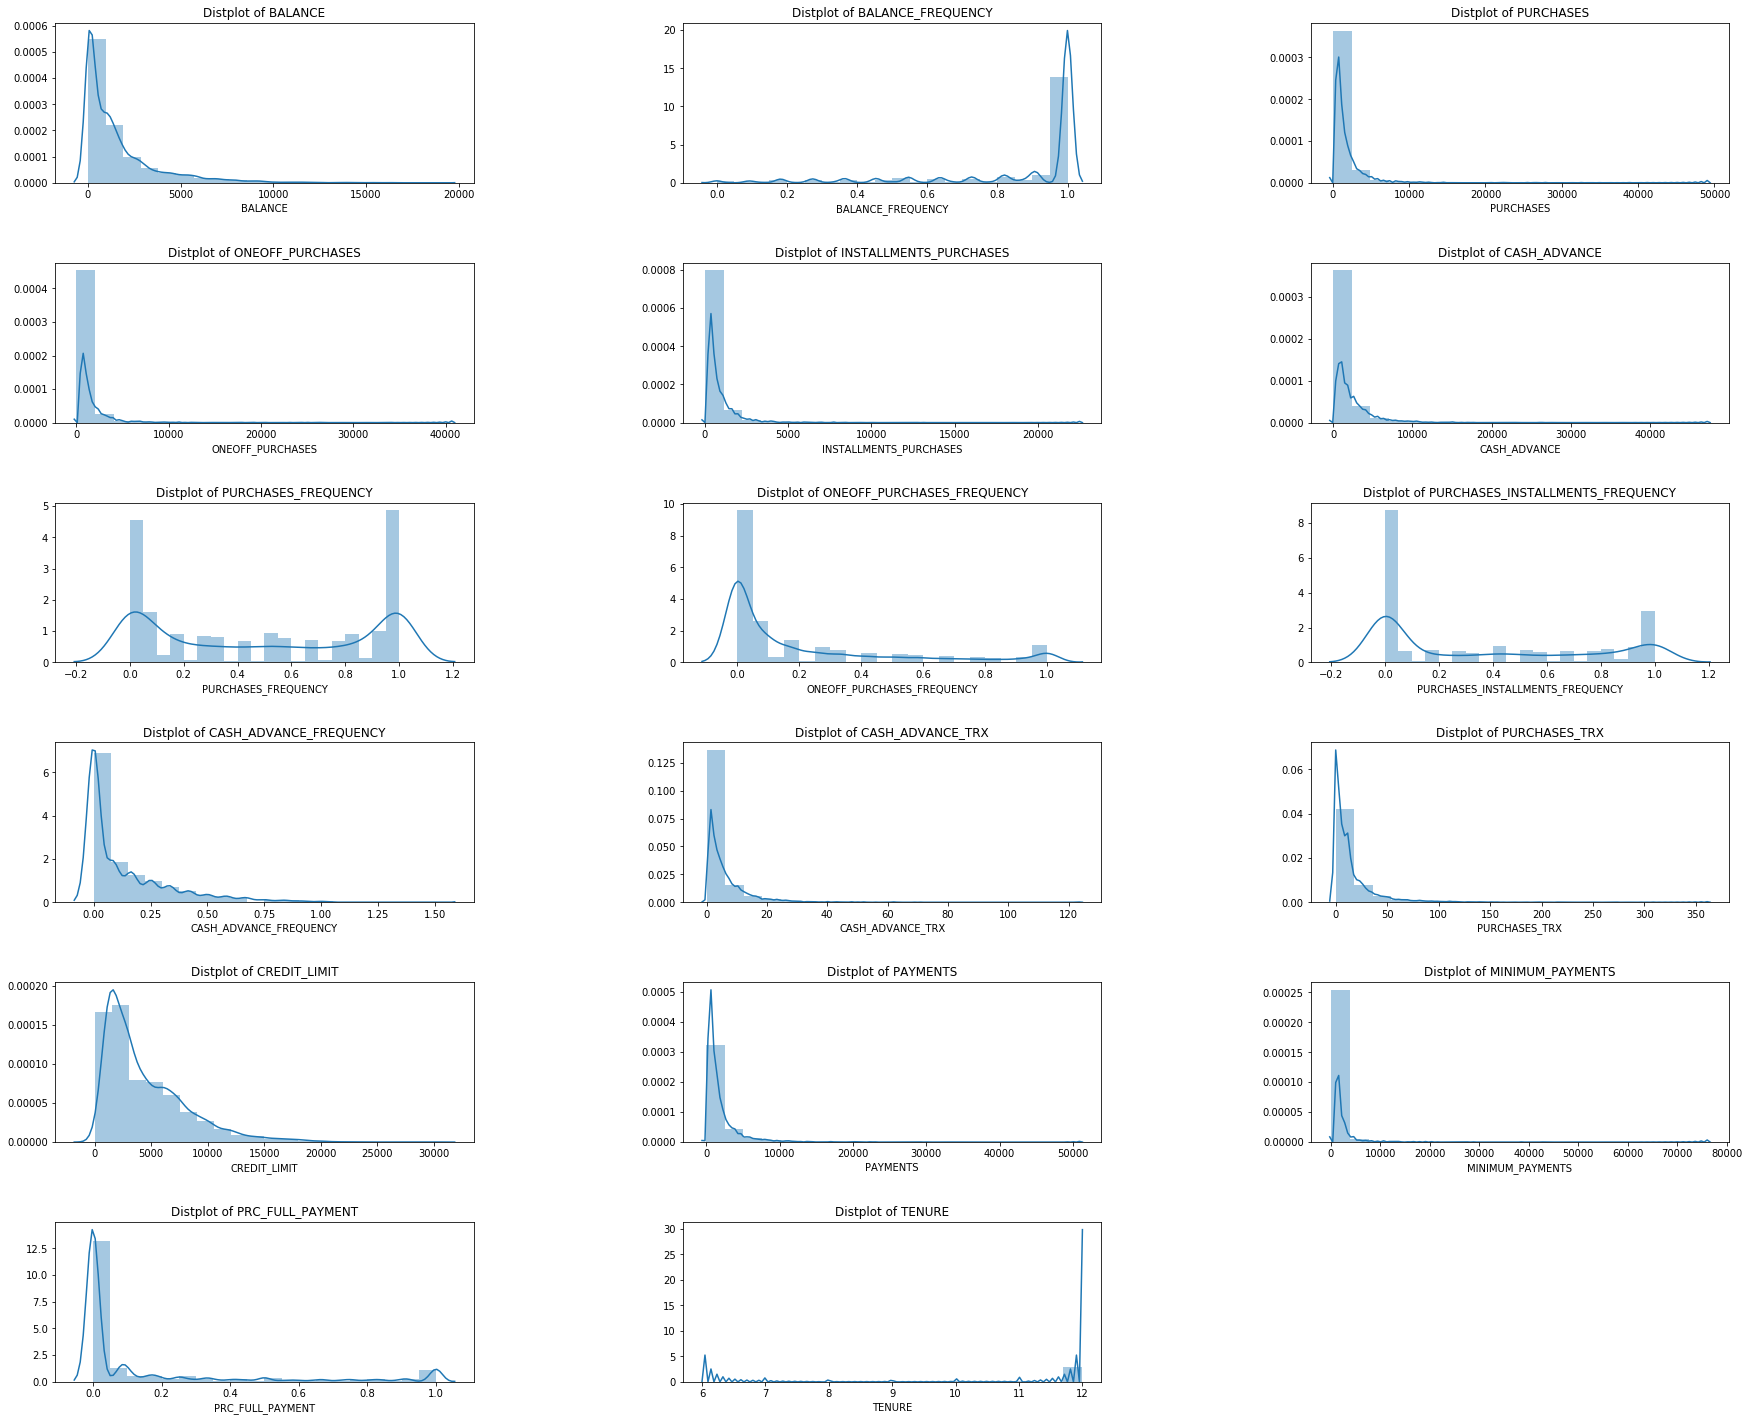

In [319]:
## Check outliers effect exist in the credit card data
plt.figure(1 , figsize = (30 , 25))
n = 0 
for x in credit_data.columns:
    n += 1
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(credit_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

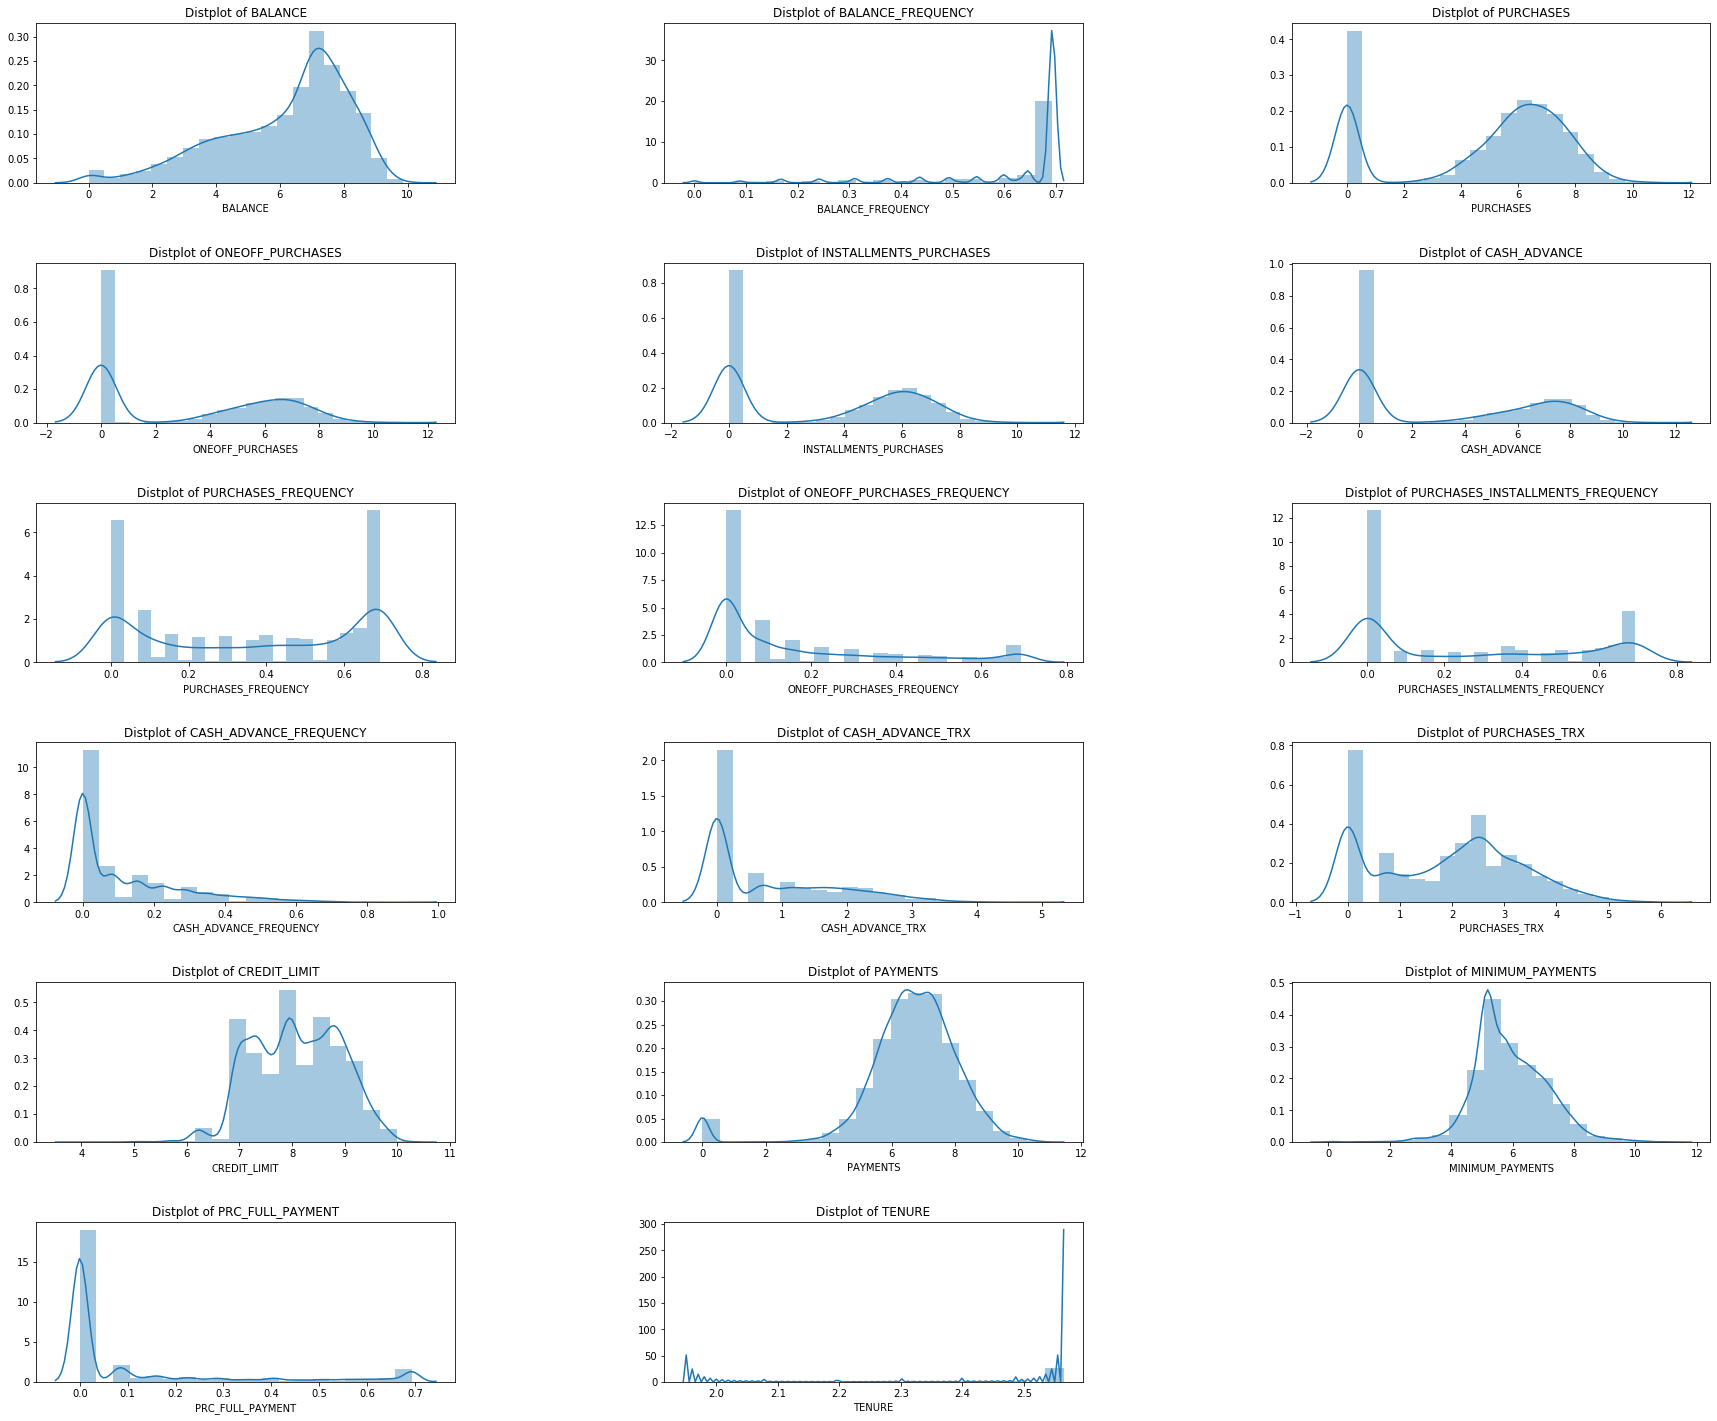

In [293]:
## Applying logarithm in all the columns to reduce outliers effect
plt.figure(1 , figsize = (30 , 25))
n = 0 
for x in credit_data.columns:
    n += 1
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(np.log(credit_data[x] +1) , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

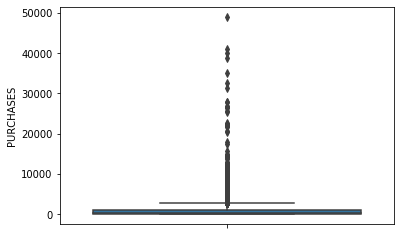

In [327]:
sns.boxplot(y="PURCHASES",data=credit_data)

In [688]:
credit_data_log=credit_data.drop(['PURCHASE_TYPE'],axis=1).applymap(lambda x: np.log(x+1))

In [689]:
credit_data_log.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,PAYMENT_MINPAY
0,3.74,0.60,4.57,0.00,4.57,0.00,0.15,0.00,0.08,0.00,0.00,1.10,6.91,5.31,4.95,0.00,2.56,2.19,0.00,0.04,0.00,0.69,0.69,1.79,1.95,1.39,0.89
1,8.07,0.65,0.00,0.00,0.00,8.77,0.00,0.00,0.00,0.22,1.61,0.00,8.85,8.32,6.98,0.20,2.56,0.00,6.29,0.38,1.10,1.39,1.39,1.39,0.69,0.69,1.57
2,7.82,0.69,6.65,6.65,0.00,0.00,0.69,0.69,0.00,0.00,0.00,2.56,8.92,6.43,6.44,0.00,2.56,4.18,0.00,0.29,0.69,0.00,0.00,0.00,1.79,2.08,0.69
3,7.42,0.49,7.31,7.31,0.00,5.33,0.08,0.08,0.00,0.08,0.69,0.69,8.92,0.00,5.75,0.00,2.56,4.84,2.90,0.20,0.69,0.00,0.00,0.00,1.79,2.08,0.00
4,6.71,0.69,2.83,2.83,0.00,0.00,0.08,0.08,0.00,0.00,0.00,0.69,7.09,6.52,5.50,0.00,2.56,0.85,0.00,0.52,0.69,0.00,0.00,0.00,1.39,1.79,1.33
5,7.50,0.69,7.20,0.00,7.20,0.00,0.51,0.00,0.46,0.00,0.00,2.20,7.50,7.24,7.79,0.00,2.56,4.72,0.00,0.70,0.00,0.69,1.10,0.69,1.10,1.95,0.46
6,6.44,0.69,8.87,8.76,6.54,0.00,0.69,0.69,0.69,0.00,0.00,4.17,9.51,8.76,5.29,0.69,2.56,6.38,0.00,0.05,0.69,1.10,1.61,1.61,1.61,1.10,3.50
7,7.51,0.69,6.08,0.00,6.08,0.00,0.69,0.00,0.69,0.00,0.00,2.56,7.74,6.52,6.28,0.00,2.56,3.62,0.00,0.58,0.00,0.69,1.10,0.69,1.10,1.95,0.82
8,6.92,0.69,6.76,6.50,5.30,0.00,0.29,0.08,0.22,0.00,0.00,1.79,8.85,6.54,5.75,0.00,2.56,4.29,0.00,0.14,0.69,1.10,1.61,1.61,1.61,0.00,1.17
9,5.03,0.44,7.16,7.16,0.00,0.00,0.15,0.15,0.00,0.00,0.00,1.39,9.31,7.06,4.62,0.00,2.56,4.68,0.00,0.01,0.69,0.00,0.00,0.00,1.79,2.08,2.53


In [690]:
for col in numerical:
    credit_data_log[col]=credit_data_log[col].clip_upper(credit_data_log[col].quantile(0.95))
    credit_data_log[col]=credit_data_log[col].clip_lower(credit_data_log[col].quantile(0.05))

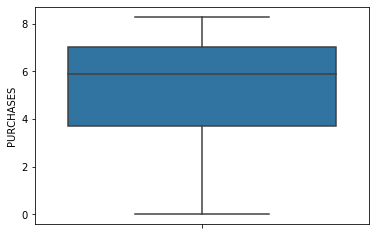

In [691]:
sns.boxplot(y="PURCHASES",data=credit_data_log)

In [692]:
credit_data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 27 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [693]:
credit_data_final=pd.concat([credit_data_log,credit_data['PURCHASE_TYPE']],axis=1)

In [697]:
credit_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [341]:
credit_data_final.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE
0,3.74,0.60,4.57,0.00,4.57,0.00,0.15,0.00,0.08,0.00,0.00,1.10,6.91,5.31,4.95,0.00,2.56,2.19,0.00,0.04,Installment_Purchases
1,8.07,0.65,0.00,0.00,0.00,8.77,0.00,0.00,0.00,0.22,1.61,0.00,8.85,8.32,6.98,0.20,2.56,0.00,6.29,0.38,None
2,7.82,0.69,6.65,6.65,0.00,0.00,0.69,0.69,0.00,0.00,0.00,2.56,8.92,6.43,6.44,0.00,2.56,4.18,0.00,0.29,One_Of
3,7.42,0.49,7.31,7.31,0.00,5.33,0.08,0.08,0.00,0.08,0.69,0.69,8.92,0.00,5.75,0.00,2.56,4.84,2.90,0.20,One_Of
4,6.71,0.69,2.83,2.83,0.00,0.00,0.08,0.08,0.00,0.00,0.00,0.69,7.09,6.52,5.50,0.00,2.56,0.85,0.00,0.52,One_Of


### Creation of Dummy variables

In [698]:
for col in categorical:
    credit_data_final = create_dummies(credit_data_final , col )

In [699]:
print(f"Number of numerical variables = {len(numerical)}")
print(f"Number of categorical variables = {len(categorical)}")

Number of numerical variables = 17
Number of categorical variables = 1


In [700]:
credit_data_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of
0,3.74,0.60,4.57,0.00,4.57,0.00,0.15,0.00,0.08,0.00,0.00,1.10,6.91,5.31,4.95,0.00,2.56,2.19,0.00,0.04,0.89,1,0,0
1,8.07,0.65,0.00,0.00,0.00,8.44,0.00,0.00,0.00,0.22,1.61,0.00,8.85,8.32,6.98,0.20,2.56,0.00,6.29,0.38,1.57,0,1,0
2,7.82,0.69,6.65,6.65,0.00,0.00,0.69,0.69,0.00,0.00,0.00,2.56,8.92,6.43,6.44,0.00,2.56,4.18,0.00,0.29,0.69,0,0,1
3,7.42,0.49,7.31,7.31,0.00,5.33,0.08,0.08,0.00,0.08,0.69,0.69,8.92,4.51,5.75,0.00,2.56,4.84,2.90,0.20,0.00,0,0,1
4,6.71,0.69,2.83,2.83,0.00,0.00,0.08,0.08,0.00,0.00,0.00,0.69,7.09,6.52,5.50,0.00,2.56,0.85,0.00,0.52,1.33,0,0,1


In [701]:
credit_data_final.shape

(8950, 24)

In [702]:
credit_data_final.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of
BALANCE,1.00,0.61,-0.10,0.17,-0.13,0.53,-0.12,0.15,-0.13,0.50,0.52,-0.04,0.30,0.46,0.80,-0.46,0.08,-0.02,0.54,0.78,-0.27,-0.37,0.23,-0.02
BALANCE_FREQUENCY,0.61,1.00,0.09,0.14,0.11,0.16,0.22,0.20,0.18,0.20,0.19,0.20,0.09,0.25,0.41,-0.11,0.12,0.14,0.15,0.47,-0.18,-0.13,0.01,-0.09
PURCHASES,-0.10,0.09,1.00,0.68,0.68,-0.50,0.81,0.57,0.61,-0.40,-0.43,0.89,0.17,0.23,-0.08,0.25,0.11,0.98,-0.48,-0.25,0.24,0.17,-0.92,0.17
ONEOFF_PURCHASES,0.17,0.14,0.68,1.00,0.15,-0.19,0.39,0.81,0.09,-0.14,-0.15,0.57,0.28,0.32,0.05,0.04,0.09,0.71,-0.18,-0.06,0.23,-0.58,-0.54,0.42
INSTALLMENTS_PURCHASES,-0.13,0.11,0.68,0.15,1.00,-0.40,0.81,0.19,0.91,-0.33,-0.35,0.78,0.09,0.16,-0.06,0.28,0.10,0.68,-0.38,-0.22,0.18,0.46,-0.59,-0.56
CASH_ADVANCE,0.53,0.16,-0.50,-0.19,-0.40,1.00,-0.45,-0.19,-0.37,0.84,0.91,-0.44,0.12,0.23,0.44,-0.33,-0.10,-0.45,0.99,0.47,-0.15,-0.31,0.54,-0.06
PURCHASES_FREQUENCY,-0.12,0.22,0.81,0.39,0.81,-0.45,1.00,0.50,0.86,-0.36,-0.39,0.93,0.10,0.17,-0.08,0.31,0.07,0.82,-0.43,-0.23,0.20,0.31,-0.71,-0.19
ONEOFF_PURCHASES_FREQUENCY,0.15,0.20,0.57,0.81,0.19,-0.19,0.50,1.00,0.14,-0.13,-0.15,0.61,0.30,0.34,0.04,0.14,0.08,0.62,-0.18,-0.08,0.26,-0.43,-0.40,0.23
PURCHASES_INSTALLMENTS_FREQUENCY,-0.13,0.18,0.61,0.09,0.91,-0.37,0.86,0.14,1.00,-0.30,-0.33,0.77,0.04,0.12,-0.06,0.26,0.08,0.61,-0.35,-0.19,0.14,0.45,-0.52,-0.49
CASH_ADVANCE_FREQUENCY,0.50,0.20,-0.40,-0.14,-0.33,0.84,-0.36,-0.13,-0.30,1.00,0.95,-0.35,0.13,0.22,0.42,-0.28,-0.13,-0.36,0.85,0.45,-0.14,-0.26,0.42,-0.03


In [703]:
credit_data_final.shape

(8950, 24)

### Standarization of credit card data

In [704]:
sc=StandardScaler()

credit_scaled=sc.fit_transform(credit_data_final)

In [705]:
credit_scaled.shape

(8950, 24)

In [706]:
credit_scaled_df=pd.DataFrame(credit_scaled)

In [707]:
credit_data_final.shape

(8950, 24)

In [708]:
credit_scaled_df.columns=credit_data_final.columns

In [709]:
credit_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of
0,-1.32,-0.21,-0.11,-0.99,0.41,-0.93,-0.75,-0.73,-0.67,-0.76,-0.83,-0.58,-1.55,-1.27,-0.97,-0.56,0.37,-0.43,-0.89,-1.02,-0.49,1.72,-0.54,-0.51
1,1.00,0.16,-1.69,-0.99,-1.09,1.46,-1.30,-0.73,-0.96,0.79,0.85,-1.41,0.98,1.41,1.05,0.39,0.37,-1.52,1.70,0.32,0.23,-0.58,1.84,-0.51
2,0.87,0.52,0.62,1.09,-1.09,-0.93,1.20,2.47,-0.96,-0.76,-0.83,0.52,1.07,-0.27,0.52,-0.56,0.37,0.56,-0.89,-0.04,-0.71,-0.58,-0.54,1.94
3,0.65,-1.01,0.85,1.29,-1.09,0.58,-1.01,-0.36,-0.96,-0.20,-0.11,-0.89,1.07,-1.98,-0.17,-0.56,0.37,0.89,0.30,-0.38,-1.44,-0.58,-0.54,1.94
4,0.27,0.52,-0.71,-0.11,-1.09,-0.93,-1.01,-0.36,-0.96,-0.76,-0.83,-0.89,-1.32,-0.19,-0.41,-0.56,0.37,-1.10,-0.89,0.89,-0.03,-0.58,-0.54,1.94


In [710]:
def validate_standardization(x):
    return pd.Series([round(x.mean(),2),round(x.std(),2)]
                     
           ,index=['Mean','Std']
    )
           

In [711]:
credit_scaled_df.apply(validate_standardization)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of
Mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
Std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [712]:
credit_data_final.columns.shape

(24,)

### Segmentation clustering

### Applying PCA

In [713]:
var_ratio={}
for n in range(4,23):
    pc=PCA(n_components=n)
    credit_scaled_pca=pc.fit(credit_scaled)
    var_ratio[n]=sum(credit_scaled_pca.explained_variance_ratio_)

In [714]:
var_ratio

{4: 0.7396694052198772,
 5: 0.7959066353739449,
 6: 0.836939175688595,
 7: 0.8711683474815257,
 8: 0.9007983762791253,
 9: 0.9287530692264241,
 10: 0.9487594851176518,
 11: 0.9612554982416801,
 12: 0.970414230693524,
 13: 0.9788003741730253,
 14: 0.9848957743444656,
 15: 0.9886338620966135,
 16: 0.9913657731778446,
 17: 0.993397494953604,
 18: 0.9952296458253669,
 19: 0.9967768804718663,
 20: 0.9982714161646055,
 21: 0.9993514615412737,
 22: 0.9996816006584034}

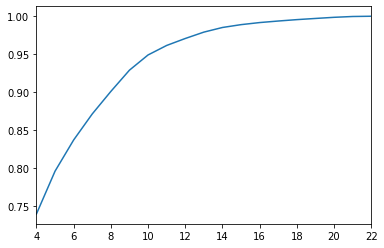

In [715]:
pd.Series(var_ratio).plot()

##### 5 Number of components is selected based on cumulative variance is explaining >75 % 

In [716]:
pc_final=PCA(n_components=5).fit(credit_scaled)

In [717]:
pc_final.explained_variance_

array([8.32057203, 4.61238832, 2.73829028, 2.08279878, 1.34984434])

### Apply factor analysis

In [718]:
reduced_cr=pc_final.fit_transform(credit_scaled)

In [719]:
dimensions = pd.DataFrame(reduced_cr)

In [720]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5"]

In [721]:
dimensions.head()

,C1,C2,C3,C4,C5
0,-0.66,-3.48,-0.91,-1.04,-0.05
1,4.56,0.61,-0.06,1.90,-1.52
2,-1.51,1.62,2.63,-2.32,-0.60
3,0.76,-0.09,2.37,-2.03,0.99
4,1.01,-1.38,1.70,-2.24,-0.96


In [722]:
### Factor Loading Matrix

factor_matrix = pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=credit_data_final.columns)
factor_matrix.to_csv('factor_matrix.csv')

In [724]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=credit_data_final.columns)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE,0.15,0.37,-0.08,-0.14,-0.15
BALANCE_FREQUENCY,0.02,0.27,-0.16,-0.15,-0.17
PURCHASES,-0.30,0.17,0.04,-0.07,0.16
ONEOFF_PURCHASES,-0.16,0.27,0.36,-0.09,0.09
INSTALLMENTS_PURCHASES,-0.26,0.09,-0.34,0.11,0.03
CASH_ADVANCE,0.27,0.19,-0.05,0.20,0.22
PURCHASES_FREQUENCY,-0.29,0.15,-0.17,0.01,0.12
ONEOFF_PURCHASES_FREQUENCY,-0.16,0.25,0.28,-0.01,0.02
PURCHASES_INSTALLMENTS_FREQUENCY,-0.24,0.08,-0.36,0.08,0.04
CASH_ADVANCE_FREQUENCY,0.24,0.20,-0.06,0.19,0.29


In [725]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0   0.35
PC_1   0.19
PC_2   0.11
PC_3   0.09
PC_4   0.06
dtype: float64

In [729]:
# Variables selected from PCA
var_list=['BALANCE_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','MONTHLY_AVG_PURCHASE','MONTHLY_CASH_ADVANCE','LIMIT_USAGE','PAYMENT_MINPAY','PURCHASE_TYPE__Installment_Purchases','PURCHASE_TYPE__One_Of','PURCHASE_TYPE__None']

In [730]:
credit_scaled_sel=credit_scaled_df[var_list]

In [731]:
credit_scaled_sel.head(5)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__One_Of,PURCHASE_TYPE__None
0,-0.21,-0.99,0.41,-0.75,-0.73,-0.67,-0.76,-0.83,-0.58,-0.43,-0.89,-1.02,-0.49,1.72,-0.51,-0.54
1,0.16,-0.99,-1.09,-1.30,-0.73,-0.96,0.79,0.85,-1.41,-1.52,1.70,0.32,0.23,-0.58,-0.51,1.84
2,0.52,1.09,-1.09,1.20,2.47,-0.96,-0.76,-0.83,0.52,0.56,-0.89,-0.04,-0.71,-0.58,1.94,-0.54
3,-1.01,1.29,-1.09,-1.01,-0.36,-0.96,-0.20,-0.11,-0.89,0.89,0.30,-0.38,-1.44,-0.58,1.94,-0.54
4,0.52,-0.11,-1.09,-1.01,-0.36,-0.96,-0.76,-0.83,-0.89,-1.10,-0.89,0.89,-0.03,-0.58,1.94,-0.54


In [732]:
credit_scaled_sel.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MONTHLY_AVG_PURCHASE',
       'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE', 'PAYMENT_MINPAY',
       'PURCHASE_TYPE__Installment_Purchases', 'PURCHASE_TYPE__One_Of',
       'PURCHASE_TYPE__None'],
      dtype='object')

In [733]:
credit_scaled_sel.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__One_Of,PURCHASE_TYPE__None
0,-0.21,-0.99,0.41,-0.75,-0.73,-0.67,-0.76,-0.83,-0.58,-0.43,-0.89,-1.02,-0.49,1.72,-0.51,-0.54
1,0.16,-0.99,-1.09,-1.30,-0.73,-0.96,0.79,0.85,-1.41,-1.52,1.70,0.32,0.23,-0.58,-0.51,1.84
2,0.52,1.09,-1.09,1.20,2.47,-0.96,-0.76,-0.83,0.52,0.56,-0.89,-0.04,-0.71,-0.58,1.94,-0.54
3,-1.01,1.29,-1.09,-1.01,-0.36,-0.96,-0.20,-0.11,-0.89,0.89,0.30,-0.38,-1.44,-0.58,1.94,-0.54
4,0.52,-0.11,-1.09,-1.01,-0.36,-0.96,-0.76,-0.83,-0.89,-1.10,-0.89,0.89,-0.03,-0.58,1.94,-0.54


In [734]:
reduced_cr

array([[-6.58460102e-01, -3.47909075e+00, -9.11802081e-01,
        -1.03861832e+00, -4.65412991e-02],
       [ 4.55590165e+00,  6.07766909e-01, -5.70157236e-02,
         1.89728316e+00, -1.52388807e+00],
       [-1.51290106e+00,  1.61693475e+00,  2.63261996e+00,
        -2.31635519e+00, -6.00418504e-01],
       ...,
       [-1.98011153e+00, -3.73911139e+00, -1.74218451e+00,
        -7.06119806e-01,  2.84465311e+00],
       [ 2.82846041e+00, -4.36679111e+00,  4.13517670e-01,
         2.85113296e-01,  2.18284992e+00],
       [-2.26010782e-01,  1.73217586e-03,  2.40733323e+00,
        -1.63088009e+00,  4.83979234e+00]])

### Choosing number clusters using Silhouette Coefficient and calinski_harabaz_score

In [735]:
kmeans_res={}
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(credit_scaled_sel)
    kmeans_res['cluster'+str(n)]=km_score
    score_c[n]=metrics.calinski_harabaz_score(credit_scaled_sel,km_score.labels_)
    score[n]=metrics.silhouette_score(credit_scaled_sel,km_score.labels_)

In [736]:
# new
score

{3: 0.33002001785595536,
 4: 0.35160518952369185,
 5: 0.35519323116521195,
 6: 0.3522708116677793,
 7: 0.339252650642501,
 8: 0.3449020923432379,
 9: 0.29243629655624803}

In [668]:

score

{3: 0.31107316563120374,
 4: 0.3312445510965535,
 5: 0.33247854616168293,
 6: 0.3283011123726622,
 7: 0.32561380491709235,
 8: 0.32663985082991165,
 9: 0.29899634097903754}

In [737]:
# new
score_c

{3: 3803.3207919969673,
 4: 4042.31945699673,
 5: 3804.7861059905845,
 6: 3560.8141028011246,
 7: 3333.7591990198543,
 8: 3136.2969973807917,
 9: 2985.0001227994967}

In [669]:
score_c

{3: 3357.610745850731,
 4: 3543.8479639607385,
 5: 3352.439791114003,
 6: 3083.046390332665,
 7: 2906.984610333848,
 8: 2767.181685312862,
 9: 2603.564278997292}

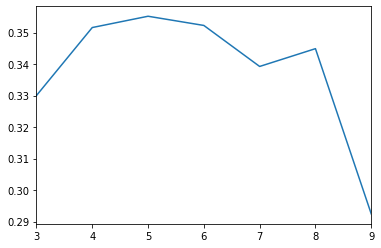

In [738]:
pd.Series(score).plot()

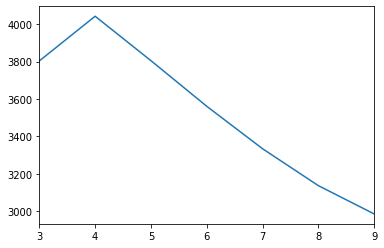

In [739]:
pd.Series(score_c).plot()

### Segmentation distribution

In [740]:
pd.Series(kmeans_res['cluster3'].labels_).value_counts()/sum(pd.Series(kmeans_res['cluster3'].labels_).value_counts())*100

0   55.21
2   23.70
1   21.09
dtype: float64

In [741]:
pd.Series(kmeans_res['cluster4'].labels_).value_counts()/sum(pd.Series(kmeans_res['cluster4'].labels_).value_counts())*100

0   30.04
2   25.32
1   23.40
3   21.24
dtype: float64

In [742]:
pd.Series(kmeans_res['cluster5'].labels_).value_counts()/sum(pd.Series(kmeans_res['cluster5'].labels_).value_counts())*100

2   22.97
0   22.49
3   21.60
1   21.06
4   11.88
dtype: float64

In [743]:
pd.Series(kmeans_res['cluster6'].labels_).value_counts()/sum(pd.Series(kmeans_res['cluster6'].labels_).value_counts())*100

0   22.94
5   22.21
1   21.41
4   13.73
3   11.83
2    7.88
dtype: float64

In [744]:
pd.Series(kmeans_res['cluster7'].labels_).value_counts()/sum(pd.Series(kmeans_res['cluster7'].labels_).value_counts())*100

0   22.94
1   20.97
4   16.30
6   13.31
3   11.44
2    7.84
5    7.20
dtype: float64

In [745]:
pd.Series(kmeans_res['cluster8'].labels_).value_counts()/sum(pd.Series(kmeans_res['cluster8'].labels_).value_counts())*100

1   22.82
6   20.37
7   14.50
4   13.28
0    9.36
3    7.89
2    7.06
5    4.72
dtype: float64

In [ ]:
##

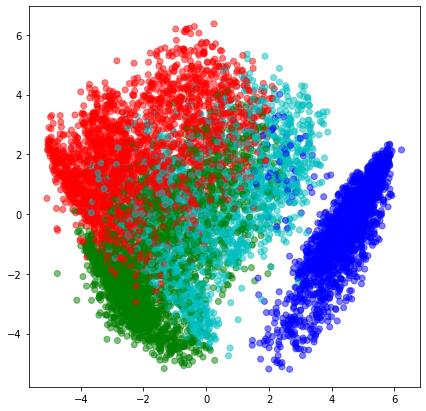

In [748]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m'}
label_color=[color_map[l] for l in kmeans_res['cluster4'].labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [750]:
cluster_df4=pd.concat([credit_data_final[var_list],pd.Series(kmeans_res['cluster4'].labels_,name='Cluster4')],axis=1)

In [752]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster4=cluster_df4.groupby('Cluster4').apply(lambda x: x[var_list].mean()).T
cluster4

Cluster4,0,1,2,3
BALANCE_FREQUENCY,0.67,0.63,0.59,0.60
ONEOFF_PURCHASES,6.40,0.03,0.06,5.79
INSTALLMENTS_PURCHASES,6.14,0.10,5.72,0.06
PURCHASES_FREQUENCY,0.59,0.00,0.51,0.26
ONEOFF_PURCHASES_FREQUENCY,0.35,0.00,0.00,0.25
PURCHASES_INSTALLMENTS_FREQUENCY,0.48,0.00,0.49,0.00
CASH_ADVANCE_FREQUENCY,0.09,0.22,0.04,0.10
CASH_ADVANCE_TRX,0.63,1.63,0.29,0.72
PURCHASES_TRX,3.15,0.03,2.28,1.61
MONTHLY_AVG_PURCHASE,4.82,0.05,3.37,3.46


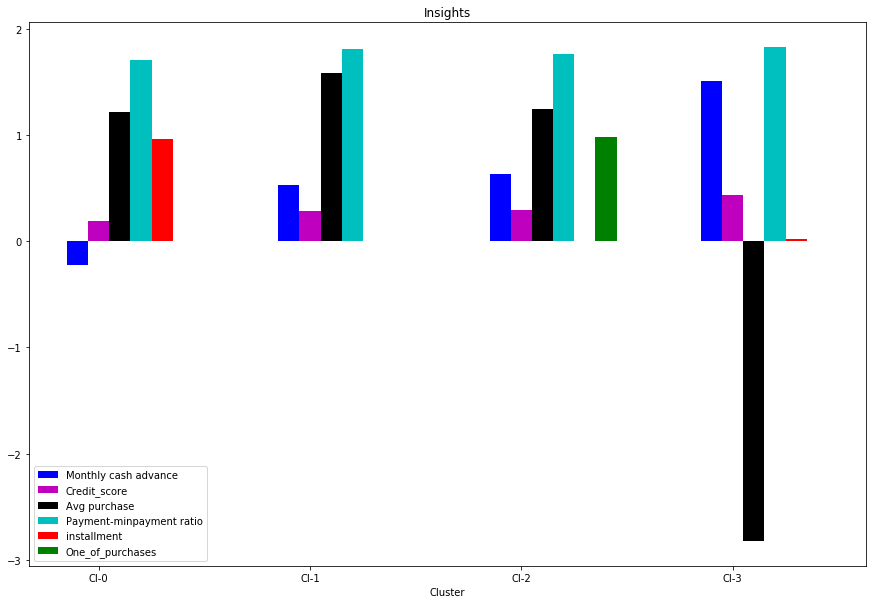

In [755]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_4.loc['LIMIT_USAGE',:].values)
monthly_purchase= np.log(cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values)
minimum_payment= np.log(cluster_4.loc['MINIMUM_PAYMENTS',:].values)
installment=cluster_4.loc['PURCHASE_TYPE__Installment_Purchases',:].values
one_off=cluster_4.loc['PURCHASE_TYPE__One_Of',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,monthly_purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,minimum_payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_of_purchases',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

### Cluster 5 insights

- Cluster 0 has highest installment purchase ,good payment_min ratio and least cash in advance

- Cluster 1 has highest purchases and good payment min ratio .

- Cluster 2 has done maximum purchases via one-off transactions ,least in installments and good credit score

- Cluster 3 has highest credit score and cash in advance but least average purchases.

### Market strategy

- Group 3 customers have highest cash advance and good credit score but poor avg purchase.Thi implies that we have to lower the interest rate to increase purchases.

- Group 1 customer are premium customers who are paying the dues on time and have done good amount of purchases transactions.It implies that wee can increase the credit limit or lower the interest rates on purchase transactions.

- Group 0 customers are spending more purchase transactions on installments.It implies that these customers require lower emi interest rates to get additional benefit and promotional offers.



- Group 2 customers are doing good purchases on one-off transactions only.It implies that they are using on specific purpose and have higher risk to leave the credit card.

### Profiling

In [756]:
credit_data_final.shape

(8950, 24)

In [759]:
# Conactenating labels found through Kmeans with data 

# save the cluster labels and sort by cluster
credit_data_final['cluster3'] = kmeans_res['cluster3'].labels_
credit_data_final['cluster4'] = kmeans_res['cluster4'].labels_
credit_data_final['cluster5'] = kmeans_res['cluster5'].labels_
credit_data_final['cluster6'] = kmeans_res['cluster6'].labels_
credit_data_final['cluster7'] = kmeans_res['cluster7'].labels_
credit_data_final['cluster8'] = kmeans_res['cluster8'].labels_

In [760]:
credit_data_final.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8
0,3.74,0.60,4.57,0.00,4.57,0.00,0.15,0.00,0.08,0.00,0.00,1.10,6.91,5.31,4.95,0.00,2.56,2.19,0.00,0.04,0.89,1,0,0,0,2,0,5,5,2
1,8.07,0.65,0.00,0.00,0.00,8.44,0.00,0.00,0.00,0.22,1.61,0.00,8.85,8.32,6.98,0.20,2.56,0.00,6.29,0.38,1.57,0,1,0,2,1,2,0,0,1
2,7.82,0.69,6.65,6.65,0.00,0.00,0.69,0.69,0.00,0.00,0.00,2.56,8.92,6.43,6.44,0.00,2.56,4.18,0.00,0.29,0.69,0,0,1,1,3,1,4,6,4
3,7.42,0.49,7.31,7.31,0.00,5.33,0.08,0.08,0.00,0.08,0.69,0.69,8.92,4.51,5.75,0.00,2.56,4.84,2.90,0.20,0.00,0,0,1,1,3,1,4,6,4
4,6.71,0.69,2.83,2.83,0.00,0.00,0.08,0.08,0.00,0.00,0.00,0.69,7.09,6.52,5.50,0.00,2.56,0.85,0.00,0.52,1.33,0,0,1,1,3,1,4,6,4


In [762]:
pd.Series.sort_index(credit_data_final.cluster4.value_counts())

0    2689
1    2094
2    2266
3    1901
Name: cluster4, dtype: int64

In [764]:
size=pd.concat([pd.Series(credit_data_final.cluster3.size), 
                pd.Series.sort_index(credit_data_final.cluster3.value_counts()), 
                pd.Series.sort_index(credit_data_final.cluster4.value_counts()),
                pd.Series.sort_index(credit_data_final.cluster5.value_counts()), 
                pd.Series.sort_index(credit_data_final.cluster6.value_counts()),
                pd.Series.sort_index(credit_data_final.cluster7.value_counts()), 
                pd.Series.sort_index(credit_data_final.cluster8.value_counts())])

In [765]:
size

0    8950
0    4941
1    1888
2    2121
0    2689
1    2094
2    2266
3    1901
0    2013
1    1885
2    2056
3    1933
4    1063
0    2053
1    1916
2     705
3    1059
4    1229
5    1988
0    2053
1    1877
2     702
3    1024
4    1459
5     644
6    1191
0     838
1    2042
2     632
3     706
4    1189
5     422
6    1823
7    1298
dtype: int64

In [766]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_data_final.cluster3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,4941,1888,2121,2689,2094,2266,1901,2013,1885,2056,1933,1063,2053,1916,705,1059,1229,1988,2053,1877,702,1024,1459,644,1191,838,2042,632,706,1189,422,1823,1298


In [767]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.00,0.55,0.21,0.24,0.30,0.23,0.25,0.21,0.22,0.21,0.23,0.22,0.12,0.23,0.21,0.08,0.12,0.14,0.22,0.23,0.21,0.08,0.11,0.16,0.07,0.13,0.09,0.23,0.07,0.08,0.13,0.05,0.20,0.15


In [768]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.00,4941.00,1888.00,2121.00,2689.00,2094.00,2266.00,1901.00,2013.00,1885.00,2056.00,1933.00,1063.00,2053.00,1916.00,705.00,1059.00,1229.00,1988.00,2053.00,1877.00,702.00,1024.00,1459.00,644.00,1191.00,838.00,2042.00,632.00,706.00,1189.00,422.00,1823.00,1298.00
Seg_Pct,1.00,0.55,0.21,0.24,0.30,0.23,0.25,0.21,0.22,0.21,0.23,0.22,0.12,0.23,0.21,0.08,0.12,0.14,0.22,0.23,0.21,0.08,0.11,0.16,0.07,0.13,0.09,0.23,0.07,0.08,0.13,0.05,0.20,0.15


In [769]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_data_final.apply(lambda x: x.mean()).T, 
                             credit_data_final.groupby('cluster3').apply(lambda x: x.mean()).T, 
                             credit_data_final.groupby('cluster4').apply(lambda x: x.mean()).T,
                             credit_data_final.groupby('cluster5').apply(lambda x: x.mean()).T, 
                             credit_data_final.groupby('cluster6').apply(lambda x: x.mean()).T,
                             credit_data_final.groupby('cluster7').apply(lambda x: x.mean()).T, 
                             credit_data_final.groupby('cluster8').apply(lambda x: x.mean()).T], 
                             
                            axis=1)


In [770]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
BALANCE,6.20,5.86,6.15,7.04,6.67,7.02,4.94,6.13,4.60,6.13,7.01,6.28,7.66,7.01,6.30,7.43,7.65,5.33,4.60,7.01,6.35,7.43,7.66,5.30,3.09,5.39,7.63,7.00,3.06,7.43,5.39,7.47,6.31,5.04
BALANCE_FREQUENCY,0.63,0.63,0.60,0.63,0.67,0.63,0.59,0.60,0.58,0.60,0.63,0.66,0.68,0.63,0.66,0.66,0.68,0.56,0.58,0.63,0.67,0.66,0.68,0.67,0.35,0.56,0.68,0.63,0.35,0.66,0.56,0.68,0.67,0.67
PURCHASES,4.87,6.54,5.81,0.15,7.20,0.10,5.74,5.81,5.71,5.80,0.02,7.29,6.65,0.02,7.30,5.55,6.64,5.94,5.72,0.01,7.32,5.54,6.66,5.94,5.27,5.95,6.99,0.00,5.26,5.54,5.95,5.68,7.30,5.97
ONEOFF_PURCHASES,3.18,3.52,5.80,0.04,6.40,0.03,0.06,5.79,0.07,5.78,0.00,6.50,4.53,0.00,6.51,5.54,4.49,5.90,0.02,0.00,6.54,5.54,4.68,0.01,0.65,5.92,6.19,0.00,0.67,5.54,5.92,0.01,6.51,0.00
INSTALLMENTS_PURCHASES,3.33,5.95,0.03,0.15,6.14,0.10,5.72,0.06,5.69,0.05,0.02,6.20,5.84,0.02,6.23,0.00,5.88,0.20,5.71,0.02,6.24,0.00,5.87,5.93,5.15,0.06,5.94,0.00,5.14,0.02,0.05,5.69,6.23,5.95
CASH_ADVANCE,3.30,1.92,2.94,6.83,2.52,6.83,1.29,2.90,0.52,2.88,6.82,0.66,7.29,6.81,0.68,7.00,7.27,0.46,0.52,6.81,0.67,7.01,7.28,0.82,0.22,0.46,7.16,6.81,0.18,7.01,0.46,7.03,0.49,0.11
PURCHASES_FREQUENCY,0.36,0.55,0.26,0.01,0.59,0.00,0.51,0.26,0.51,0.25,0.00,0.60,0.54,0.00,0.60,0.22,0.54,0.28,0.51,0.00,0.61,0.21,0.54,0.57,0.35,0.28,0.56,0.00,0.35,0.21,0.28,0.47,0.60,0.58
ONEOFF_PURCHASES_FREQUENCY,0.16,0.19,0.26,0.00,0.35,0.00,0.00,0.25,0.00,0.25,0.00,0.37,0.21,0.00,0.37,0.22,0.21,0.27,0.00,0.00,0.37,0.21,0.22,0.00,0.02,0.28,0.30,0.00,0.02,0.21,0.28,0.00,0.37,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,0.27,0.49,0.00,0.00,0.48,0.00,0.49,0.00,0.49,0.00,0.00,0.49,0.46,0.00,0.49,0.00,0.46,0.01,0.49,0.00,0.50,0.00,0.46,0.55,0.32,0.00,0.46,0.00,0.32,0.00,0.00,0.45,0.50,0.56
CASH_ADVANCE_FREQUENCY,0.11,0.06,0.10,0.23,0.09,0.22,0.04,0.10,0.01,0.10,0.22,0.01,0.28,0.22,0.01,0.25,0.27,0.01,0.01,0.22,0.01,0.26,0.28,0.02,0.00,0.01,0.26,0.22,0.00,0.25,0.01,0.23,0.01,0.00


In [771]:
Profling_output.shape

(30, 34)

In [772]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [773]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.00,4941.00,1888.00,2121.00,2689.00,2094.00,2266.00,1901.00,2013.00,1885.00,2056.00,1933.00,1063.00,2053.00,1916.00,705.00,1059.00,1229.00,1988.00,2053.00,1877.00,702.00,1024.00,1459.00,644.00,1191.00,838.00,2042.00,632.00,706.00,1189.00,422.00,1823.00,1298.00
Seg_Pct,1.00,0.55,0.21,0.24,0.30,0.23,0.25,0.21,0.22,0.21,0.23,0.22,0.12,0.23,0.21,0.08,0.12,0.14,0.22,0.23,0.21,0.08,0.11,0.16,0.07,0.13,0.09,0.23,0.07,0.08,0.13,0.05,0.20,0.15
BALANCE,6.20,5.86,6.15,7.04,6.67,7.02,4.94,6.13,4.60,6.13,7.01,6.28,7.66,7.01,6.30,7.43,7.65,5.33,4.60,7.01,6.35,7.43,7.66,5.30,3.09,5.39,7.63,7.00,3.06,7.43,5.39,7.47,6.31,5.04
BALANCE_FREQUENCY,0.63,0.63,0.60,0.63,0.67,0.63,0.59,0.60,0.58,0.60,0.63,0.66,0.68,0.63,0.66,0.66,0.68,0.56,0.58,0.63,0.67,0.66,0.68,0.67,0.35,0.56,0.68,0.63,0.35,0.66,0.56,0.68,0.67,0.67
PURCHASES,4.87,6.54,5.81,0.15,7.20,0.10,5.74,5.81,5.71,5.80,0.02,7.29,6.65,0.02,7.30,5.55,6.64,5.94,5.72,0.01,7.32,5.54,6.66,5.94,5.27,5.95,6.99,0.00,5.26,5.54,5.95,5.68,7.30,5.97
ONEOFF_PURCHASES,3.18,3.52,5.80,0.04,6.40,0.03,0.06,5.79,0.07,5.78,0.00,6.50,4.53,0.00,6.51,5.54,4.49,5.90,0.02,0.00,6.54,5.54,4.68,0.01,0.65,5.92,6.19,0.00,0.67,5.54,5.92,0.01,6.51,0.00
INSTALLMENTS_PURCHASES,3.33,5.95,0.03,0.15,6.14,0.10,5.72,0.06,5.69,0.05,0.02,6.20,5.84,0.02,6.23,0.00,5.88,0.20,5.71,0.02,6.24,0.00,5.87,5.93,5.15,0.06,5.94,0.00,5.14,0.02,0.05,5.69,6.23,5.95
CASH_ADVANCE,3.30,1.92,2.94,6.83,2.52,6.83,1.29,2.90,0.52,2.88,6.82,0.66,7.29,6.81,0.68,7.00,7.27,0.46,0.52,6.81,0.67,7.01,7.28,0.82,0.22,0.46,7.16,6.81,0.18,7.01,0.46,7.03,0.49,0.11
PURCHASES_FREQUENCY,0.36,0.55,0.26,0.01,0.59,0.00,0.51,0.26,0.51,0.25,0.00,0.60,0.54,0.00,0.60,0.22,0.54,0.28,0.51,0.00,0.61,0.21,0.54,0.57,0.35,0.28,0.56,0.00,0.35,0.21,0.28,0.47,0.60,0.58
ONEOFF_PURCHASES_FREQUENCY,0.16,0.19,0.26,0.00,0.35,0.00,0.00,0.25,0.00,0.25,0.00,0.37,0.21,0.00,0.37,0.22,0.21,0.27,0.00,0.00,0.37,0.21,0.22,0.00,0.02,0.28,0.30,0.00,0.02,0.21,0.28,0.00,0.37,0.00


In [774]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [775]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.00,4941.00,1888.00,2121.00,2689.00,2094.00,2266.00,1901.00,2013.00,1885.00,2056.00,1933.00,1063.00,2053.00,1916.00,705.00,1059.00,1229.00,1988.00,2053.00,1877.00,702.00,1024.00,1459.00,644.00,1191.00,838.00,2042.00,632.00,706.00,1189.00,422.00,1823.00,1298.00
Seg_Pct,1.00,0.55,0.21,0.24,0.30,0.23,0.25,0.21,0.22,0.21,0.23,0.22,0.12,0.23,0.21,0.08,0.12,0.14,0.22,0.23,0.21,0.08,0.11,0.16,0.07,0.13,0.09,0.23,0.07,0.08,0.13,0.05,0.20,0.15
BALANCE,6.20,5.86,6.15,7.04,6.67,7.02,4.94,6.13,4.60,6.13,7.01,6.28,7.66,7.01,6.30,7.43,7.65,5.33,4.60,7.01,6.35,7.43,7.66,5.30,3.09,5.39,7.63,7.00,3.06,7.43,5.39,7.47,6.31,5.04
BALANCE_FREQUENCY,0.63,0.63,0.60,0.63,0.67,0.63,0.59,0.60,0.58,0.60,0.63,0.66,0.68,0.63,0.66,0.66,0.68,0.56,0.58,0.63,0.67,0.66,0.68,0.67,0.35,0.56,0.68,0.63,0.35,0.66,0.56,0.68,0.67,0.67
PURCHASES,4.87,6.54,5.81,0.15,7.20,0.10,5.74,5.81,5.71,5.80,0.02,7.29,6.65,0.02,7.30,5.55,6.64,5.94,5.72,0.01,7.32,5.54,6.66,5.94,5.27,5.95,6.99,0.00,5.26,5.54,5.95,5.68,7.30,5.97
ONEOFF_PURCHASES,3.18,3.52,5.80,0.04,6.40,0.03,0.06,5.79,0.07,5.78,0.00,6.50,4.53,0.00,6.51,5.54,4.49,5.90,0.02,0.00,6.54,5.54,4.68,0.01,0.65,5.92,6.19,0.00,0.67,5.54,5.92,0.01,6.51,0.00
INSTALLMENTS_PURCHASES,3.33,5.95,0.03,0.15,6.14,0.10,5.72,0.06,5.69,0.05,0.02,6.20,5.84,0.02,6.23,0.00,5.88,0.20,5.71,0.02,6.24,0.00,5.87,5.93,5.15,0.06,5.94,0.00,5.14,0.02,0.05,5.69,6.23,5.95
CASH_ADVANCE,3.30,1.92,2.94,6.83,2.52,6.83,1.29,2.90,0.52,2.88,6.82,0.66,7.29,6.81,0.68,7.00,7.27,0.46,0.52,6.81,0.67,7.01,7.28,0.82,0.22,0.46,7.16,6.81,0.18,7.01,0.46,7.03,0.49,0.11
PURCHASES_FREQUENCY,0.36,0.55,0.26,0.01,0.59,0.00,0.51,0.26,0.51,0.25,0.00,0.60,0.54,0.00,0.60,0.22,0.54,0.28,0.51,0.00,0.61,0.21,0.54,0.57,0.35,0.28,0.56,0.00,0.35,0.21,0.28,0.47,0.60,0.58
ONEOFF_PURCHASES_FREQUENCY,0.16,0.19,0.26,0.00,0.35,0.00,0.00,0.25,0.00,0.25,0.00,0.37,0.21,0.00,0.37,0.22,0.21,0.27,0.00,0.00,0.37,0.21,0.22,0.00,0.02,0.28,0.30,0.00,0.02,0.21,0.28,0.00,0.37,0.00


In [776]:
Profling_output_final.to_csv('Profiling_segmentation_output1.csv')

### From the porfiling analysis and kmeans segmentation,credit card customers needs to be segmented into 4 groups.
#### Following are the insights and market strategy to be perfomred on these 4 customers segments.

### Cluster 4 insights

- Cluster 0 has highest installment purchase ,good payment_min ratio and least cash in advance

- Cluster 1 has highest purchases and good payment min ratio .

- Cluster 2 has done maximum purchases via one-off transactions ,least in installments and good credit score

- Cluster 3 has highest credit score and cash in advance but least average purchases.

### Market strategy

- Group 3 customers have highest cash advance and good credit score but poor avg purchase.Thi implies that we have to lower the interest rate to increase purchases.

- Group 1 customer are premium customers who are paying the dues on time and have done good amount of purchases transactions.It implies that wee can increase the credit limit or lower the interest rates on purchase transactions.

- Group 0 customers are spending more purchase transactions on installments.It implies that these customers require lower emi interest rates to get additional benefit and promotional offers.



- Group 2 customers are doing good purchases on one-off transactions only.It implies that they are using on specific purpose and have higher risk to leave the credit card.

### Prediction of new customer segments

In [777]:
new_cust = pd.read_csv('new_cust_data.csv')

In [778]:
new_cust

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C19001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000,201.80,139.51,0.00,12
1,C19002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000,4103.03,1072.34,0.22,12
2,C19003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500,622.07,627.28,0.00,12
3,C19004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500,0.00,nan,0.00,12
4,C19005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200,678.33,244.79,0.00,12


In [779]:
new_cust['MONTHLY_AVG_PURCHASE']=new_cust['PURCHASES']/new_cust['TENURE']

In [780]:
new_cust['MONTHLY_CASH_ADVANCE']=new_cust['CASH_ADVANCE']/new_cust['TENURE']

In [781]:
new_cust['LIMIT_USAGE']=new_cust['BALANCE']/new_cust['CREDIT_LIMIT']

In [782]:
new_cust['PURCHASE_TYPE']=np.where((new_cust['ONEOFF_PURCHASES']==0) & (new_cust['INSTALLMENTS_PURCHASES']==0),'None',
                                      np.where(
                                          (new_cust['ONEOFF_PURCHASES']>0) & (new_cust['INSTALLMENTS_PURCHASES']==0),'One_Of',
                                           
                                           np.where((new_cust['ONEOFF_PURCHASES']==0) & (new_cust['INSTALLMENTS_PURCHASES']>0),'Installment_Purchases',
                                                     np.where((new_cust['ONEOFF_PURCHASES']>0) & (new_cust['INSTALLMENTS_PURCHASES']>0),'Both',np.nan
                                                     
                                                     
                                                     )
                                                     
                                           
                                           
                                           )
                                      
                                      
                                      )
                                      
                                      
                                      )

In [783]:
new_cust['PAYMENT_MINPAY']=new_cust.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [784]:
new_cust.shape

(5, 23)

In [551]:
new_cust_final.drop(columns=['PURCHASE_TYPE__None','PURCHASE_TYPE__One_Of'],axis=1,inplace=True)

In [785]:
new_cust_final=pd.concat([new_cust,pd.get_dummies(new_cust['PURCHASE_TYPE'], prefix='PURCHASE_TYPE'+"_")],axis=1)

In [786]:
new_cust_final.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of
0,C19001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000,201.80,139.51,0.00,12,7.95,0.00,0.04,Installment_Purchases,1.45,1,0,0
1,C19002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000,4103.03,1072.34,0.22,12,0.00,536.91,0.46,None,3.83,0,1,0
2,C19003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500,622.07,627.28,0.00,12,64.43,0.00,0.33,One_Of,0.99,0,0,1
3,C19004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500,0.00,nan,0.00,12,124.92,17.15,0.22,One_Of,nan,0,0,1
4,C19005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200,678.33,244.79,0.00,12,1.33,0.00,0.68,One_Of,2.77,0,0,1


In [787]:
new_cust_final.drop(columns=['PURCHASE_TYPE'],axis=1,inplace=True)

In [788]:
new_cust_final.drop(columns=['CUST_ID'],axis=1,inplace=True)

In [789]:
new_cust_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000,201.80,139.51,0.00,12,7.95,0.00,0.04,1.45,1,0,0
1,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000,4103.03,1072.34,0.22,12,0.00,536.91,0.46,3.83,0,1,0
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500,622.07,627.28,0.00,12,64.43,0.00,0.33,0.99,0,0,1
3,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500,0.00,nan,0.00,12,124.92,17.15,0.22,nan,0,0,1
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200,678.33,244.79,0.00,12,1.33,0.00,0.68,2.77,0,0,1


In [790]:
credit_data_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__None,PURCHASE_TYPE__One_Of,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8
0,3.74,0.60,4.57,0.00,4.57,0.00,0.15,0.00,0.08,0.00,0.00,1.10,6.91,5.31,4.95,0.00,2.56,2.19,0.00,0.04,0.89,1,0,0,0,2,0,5,5,2
1,8.07,0.65,0.00,0.00,0.00,8.44,0.00,0.00,0.00,0.22,1.61,0.00,8.85,8.32,6.98,0.20,2.56,0.00,6.29,0.38,1.57,0,1,0,2,1,2,0,0,1
2,7.82,0.69,6.65,6.65,0.00,0.00,0.69,0.69,0.00,0.00,0.00,2.56,8.92,6.43,6.44,0.00,2.56,4.18,0.00,0.29,0.69,0,0,1,1,3,1,4,6,4
3,7.42,0.49,7.31,7.31,0.00,5.33,0.08,0.08,0.00,0.08,0.69,0.69,8.92,4.51,5.75,0.00,2.56,4.84,2.90,0.20,0.00,0,0,1,1,3,1,4,6,4
4,6.71,0.69,2.83,2.83,0.00,0.00,0.08,0.08,0.00,0.00,0.00,0.69,7.09,6.52,5.50,0.00,2.56,0.85,0.00,0.52,1.33,0,0,1,1,3,1,4,6,4


In [791]:
new_cust_scaled=sc.transform(new_cust_final)

In [792]:
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns=new_cust_final.columns)

In [793]:
sel_list=['BALANCE_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','MONTHLY_AVG_PURCHASE','MONTHLY_CASH_ADVANCE','LIMIT_USAGE','PAYMENT_MINPAY','PURCHASE_TYPE__Installment_Purchases','PURCHASE_TYPE__One_Of','PURCHASE_TYPE__None']

In [794]:
new_cust_scaled = new_cust_scaled[sel_list]

In [795]:
new_cust_scaled.shape

(5, 16)

In [569]:
import numpy as np

In [796]:
def kmeans_assignment(centroids, points):
    num_centroids, dim = centroids.shape
    num_points, _ = points.shape

  # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points, 1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])

  # Compute all distances (for all points and all centroids) at once and 
  # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)

In [797]:
centroids = kmeans_res['cluster4'].cluster_centers_

In [798]:
points = new_cust_scaled

In [799]:
points

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,PURCHASE_TYPE__Installment_Purchases,PURCHASE_TYPE__One_Of,PURCHASE_TYPE__None
0,1.47,-0.99,30.22,-0.70,-0.73,-0.66,-0.76,-0.83,0.10,2.45,-0.89,-1.02,0.09,1.72,-0.51,-0.54
1,2.16,-0.99,-1.09,-1.30,-0.73,-0.96,0.98,3.34,-1.41,-1.52,220.10,0.64,2.63,-0.58,-0.51,1.84
2,2.85,240.52,-1.09,2.30,3.88,-0.96,-0.76,-0.83,7.61,30.65,-0.89,0.15,-0.39,-0.58,1.94,-0.54
3,0.09,467.25,-1.09,-1.00,-0.35,-0.96,-0.18,0.21,-0.66,60.85,6.17,-0.30,nan,-0.58,1.94,-0.54
4,2.85,4.01,-1.09,-1.00,-0.35,-0.96,-0.76,-0.83,-0.66,-0.86,-0.89,1.54,1.50,-0.58,1.94,-0.54


In [800]:
centroids

array([[ 0.32576457,  1.00827964,  0.92155974,  0.81611529,  0.86506002,
         0.75980752, -0.16435319, -0.17249319,  0.95719586,  0.88580621,
        -0.21184133, -0.06575764,  0.31292641, -0.58122082, -0.514625  ,
        -0.54369045],
       [ 0.02952398, -0.98287076, -1.06078666, -1.28757241, -0.72881018,
        -0.94732987,  0.80231368,  0.87071502, -1.38391271, -1.49947572,
         0.9581445 ,  0.53141966, -0.23513989, -0.54384781, -0.51110382,
         1.78010589],
       [-0.25219966, -0.97236381,  0.78650229,  0.54146122, -0.72508069,
         0.77363401, -0.49100706, -0.5303048 ,  0.30964451,  0.16170813,
        -0.5429408 , -0.39690666, -0.11451667,  1.67988565, -0.514625  ,
        -0.54369045],
       [-0.19269843,  0.81548858, -1.07259393, -0.38154053,  0.44345868,
        -0.9534289 , -0.06600585, -0.08299441, -0.19865383,  0.20596456,
        -0.10857937, -0.0192425 , -0.04712331, -0.58122082,  1.90437573,
        -0.54369045]])

In [801]:
kmeans_assignment(centroids, points)

array([2, 1, 0, 0, 3], dtype=int64)

In [802]:
new_cust['pred_segment'] = pd.Series(kmeans_assignment(centroids, points))

In [803]:
new_cust.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE,PAYMENT_MINPAY,pred_segment
0,C19001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000,201.80,139.51,0.00,12,7.95,0.00,0.04,Installment_Purchases,1.45,2
1,C19002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000,4103.03,1072.34,0.22,12,0.00,536.91,0.46,None,3.83,1
2,C19003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500,622.07,627.28,0.00,12,64.43,0.00,0.33,One_Of,0.99,0
3,C19004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500,0.00,nan,0.00,12,124.92,17.15,0.22,One_Of,nan,0
4,C19005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200,678.33,244.79,0.00,12,1.33,0.00,0.68,One_Of,2.77,3
